51
0
100
0
104
255


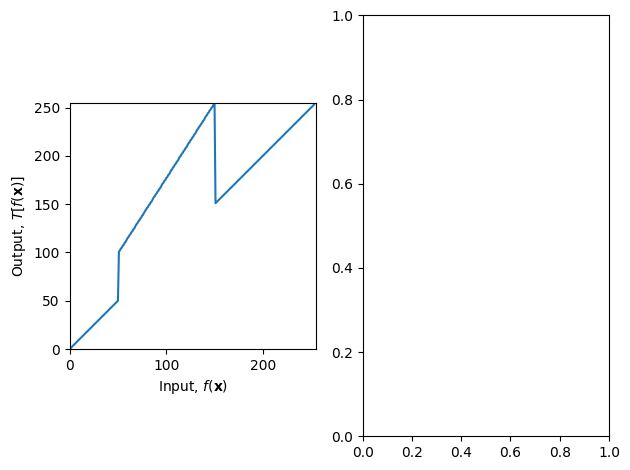

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\lut.cpp:368: error: (-215:Assertion failed) (lutcn == cn || lutcn == 1) && _lut.total() == 256 && _lut.isContinuous() && (depth == CV_8U || depth == CV_8S) in function 'cv::LUT'


: 

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt



t1 = np.linspace(0,50,51).astype('uint8')   # 0,50,101
print(len(t1))

t2 = np.linspace(51,100,0).astype('uint8')   #51,200,50
print(len(t2))

t3 = np.linspace(101,255,100).astype('uint8')   #201,255,105
print(len(t3))

t4 = np.linspace(255,150,0).astype('uint8')   # 0,50,101
print(len(t4))

t5 = np.linspace(151,255,104).astype('uint8')   #51,200,50
print(len(t5))



transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
transform = np.concatenate((transform, t4), axis=0).astype('uint8')
transform = np.concatenate((transform, t5), axis=0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots(1,2)
ax[0].plot(transform)
ax[0].set_xlabel(r'Input, $f(\mathbf{x})$')
ax[0].set_ylabel(r'Output, $T[f(\mathbf{x})]$')
ax[0].set_xlim(0, 255)
ax[0].set_ylim(0, 255)
ax[0].set_aspect('equal')
plt.savefig('transform.png')
plt.tight_layout()
plt.show()

img_orig = cv.imread('emma.jpg', cv.IMREAD_GRAYSCALE)
cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", img_orig)
cv.waitKey(0)

image_transformed = cv.LUT(img_orig, transform)
cv.imshow("Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()